# Looking at Bicycle Culture in Moscow 

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString
import json
from pandas.io.json import json_normalize

### Bicycle culture in any given city is complex. One of the most visible factors of bicycle culture is if a city has a bikeshare, as this indicates that the city government sees value in bicycles in their cities. Hence, I begin my analysis with how Muscovites use their bikeshare, Velobike (Велобайк).  

## Looking at Moscow Bike Rental Stations
### This data describes where the Velobike rental stations are in Moscow.

In [2]:
moscow_bike_rentals_df=pd.read_json('../data/Moscow_Data/moscow_bike_rentals.json')

In [3]:
moscow_bike_rentals_df

,Cells,Number,global_id
0,"{'global_id': 2757552, 'Photo': '1994d8c3-6c38...",1,2757552
1,"{'global_id': 2757553, 'Photo': 'c240e124-c6ab...",2,2757553
2,"{'global_id': 2757554, 'Photo': '0a25be19-78f5...",3,2757554
3,"{'global_id': 2757555, 'Photo': '6cd7629e-9580...",4,2757555
4,"{'global_id': 2757557, 'Photo': '7e615469-2820...",5,2757557
5,"{'global_id': 2757558, 'Photo': '91c0c798-a4ac...",6,2757558
6,"{'global_id': 2757559, 'Photo': '93983696-d0fa...",7,2757559
7,"{'global_id': 2757560, 'Photo': '71397c56-a507...",8,2757560
8,"{'global_id': 2757561, 'Photo': 'b8fd9988-dfe2...",9,2757561
9,"{'global_id': 2757562, 'Photo': 'b98e918c-8c0d...",10,2757562


There is clearly a problem here, as all the data is in one column. So, we need to normalize this data.

In [4]:
moscow_bike_rentals_normalized_df = json_normalize(moscow_bike_rentals_df["Cells"])

In [5]:
moscow_bike_rentals_normalized_df

,AdmArea_en,BikeParkingSlotsAmount,ClarificationOfLocation_en,DepartamentalAffiliation_en,District_en,Location_en,Name_en,OperOrgName_en,OperOrgWebsite_en,Photo,StationCapacity,geoData.coordinates,geoData.type,global_id
0,Czentral`ny'j administrativny'j okrug,14,None,Moscow Department of transportation and develo...,rajon Xamovniki,"Гоголевский бульвар, дом 17, строение 1",Пункт проката велосипедов № 2,ЗАО «СитиБайк»,www.velobike.ru,1994d8c3-6c38-428d-807b-b7bc51f44062,14,"[37.599599999724, 55.746900000147]",Point,2757552
1,Czentral`ny'j administrativny'j okrug,12,None,Moscow Department of transportation and develo...,rajon Arbat,"Гоголевский бульвар, дом 33",Пункт проката велосипедов № 3,ЗАО «СитиБайк»,www.velobike.ru,c240e124-c6ab-4a3d-ae64-9475c6b7f8e4,12,"[37.600599999806, 55.750899999798]",Point,2757553
2,Czentral`ny'j administrativny'j okrug,12,None,Moscow Department of transportation and develo...,Presnenskij rajon,"Никитский бульвар, дом 11/12, строение 3",Пункт проката велосипедов № 5,ЗАО «СитиБайк»,www.velobike.ru,0a25be19-78f5-4a1b-a0f4-3b985d3610dc,12,"[37.599999999757, 55.755399999791]",Point,2757554
3,Czentral`ny'j administrativny'j okrug,8,None,Moscow Department of transportation and develo...,Presnenskij rajon,"Большая Никитская улица, дом 23/14/9",Пункт проката велосипедов № 6,ЗАО «СитиБайк»,www.velobike.ru,6cd7629e-9580-4650-a623-596f6333dc03,15,"[37.5985, 55.7573]",Point,2757555
4,Czentral`ny'j administrativny'j okrug,14,None,Moscow Department of transportation and develo...,Presnenskij rajon,"Тверской бульвар, дом 17, строение 1",Пункт проката велосипедов № 8,ЗАО «СитиБайк»,www.velobike.ru,7e615469-2820-42fe-8314-5b450730dbda,14,"[37.602199999939, 55.761600000013]",Point,2757557
5,Czentral`ny'j administrativny'j okrug,16,None,Moscow Department of transportation and develo...,Tverskoj rajon,"Тверской бульвар, дом 28",Пункт проката велосипедов № 9,ЗАО «СитиБайк»,www.velobike.ru,91c0c798-a4ac-4ef2-bfe7-20bcda4090ec,20,"[37.6051, 55.7646]",Point,2757558
6,Czentral`ny'j administrativny'j okrug,10,None,Moscow Department of transportation and develo...,Tverskoj rajon,"Страстной бульвар, дом 8А",Пункт проката велосипедов № 10,ЗАО «СитиБайк»,www.velobike.ru,93983696-d0fa-4058-bcb1-2cad85e0b64b,14,"[37.6095, 55.7667]",Point,2757559
7,Czentral`ny'j administrativny'j okrug,8,None,Moscow Department of transportation and develo...,Tverskoj rajon,"Страстной бульвар, дом 16",Пункт проката велосипедов № 11,ЗАО «СитиБайк»,www.velobike.ru,71397c56-a507-4f79-9993-4308818f0226,8,"[37.613100000391, 55.768099999796]",Point,2757560
8,Czentral`ny'j administrativny'j okrug,10,None,Moscow Department of transportation and develo...,Basmanny'j rajon,"Мясницкая ул., д.10",Пункт проката велосипедов № 16,ЗАО «СитиБайк»,www.velobike.ru,b8fd9988-dfe2-4acb-ba35-afa96d0c2da6,10,"[37.631468, 55.760244]",Point,2757561
9,Czentral`ny'j administrativny'j okrug,8,None,Moscow Department of transportation and develo...,Basmanny'j rajon,"Чистопрудный бульвар, дом 8, строение 1",Пункт проката велосипедов № 17,ЗАО «СитиБайк»,www.velobike.ru,b98e918c-8c0d-4708-b63d-3b0b12ac9f4b,8,"[37.641700000061, 55.7631]",Point,2757562


Much better! Now time to look at the data and see what variables matter. I am looking to see if it's the same answer in certain categorical columns (i.e. AdmArea_en) for every row, and what neighborhoods in Moscow have the most bike rental stations, i.e, frequency and patterns. I will also be looking for missing data and duplicates, with the magic number being the number of rows, 442. 

In [6]:
moscow_bike_rentals_normalized_df.shape

(442, 14)

In [7]:
moscow_bike_rentals_normalized_df.columns

Index(['AdmArea_en', 'BikeParkingSlotsAmount', 'ClarificationOfLocation_en',
       'DepartamentalAffiliation_en', 'District_en', 'Location_en', 'Name_en',
       'OperOrgName_en', 'OperOrgWebsite_en', 'Photo', 'StationCapacity',
       'geoData.coordinates', 'geoData.type', 'global_id'],
      dtype='object')

In [8]:
moscow_bike_rentals_normalized_df.head(10)

,AdmArea_en,BikeParkingSlotsAmount,ClarificationOfLocation_en,DepartamentalAffiliation_en,District_en,Location_en,Name_en,OperOrgName_en,OperOrgWebsite_en,Photo,StationCapacity,geoData.coordinates,geoData.type,global_id
0,Czentral`ny'j administrativny'j okrug,14,None,Moscow Department of transportation and develo...,rajon Xamovniki,"Гоголевский бульвар, дом 17, строение 1",Пункт проката велосипедов № 2,ЗАО «СитиБайк»,www.velobike.ru,1994d8c3-6c38-428d-807b-b7bc51f44062,14,"[37.599599999724, 55.746900000147]",Point,2757552
1,Czentral`ny'j administrativny'j okrug,12,None,Moscow Department of transportation and develo...,rajon Arbat,"Гоголевский бульвар, дом 33",Пункт проката велосипедов № 3,ЗАО «СитиБайк»,www.velobike.ru,c240e124-c6ab-4a3d-ae64-9475c6b7f8e4,12,"[37.600599999806, 55.750899999798]",Point,2757553
2,Czentral`ny'j administrativny'j okrug,12,None,Moscow Department of transportation and develo...,Presnenskij rajon,"Никитский бульвар, дом 11/12, строение 3",Пункт проката велосипедов № 5,ЗАО «СитиБайк»,www.velobike.ru,0a25be19-78f5-4a1b-a0f4-3b985d3610dc,12,"[37.599999999757, 55.755399999791]",Point,2757554
3,Czentral`ny'j administrativny'j okrug,8,None,Moscow Department of transportation and develo...,Presnenskij rajon,"Большая Никитская улица, дом 23/14/9",Пункт проката велосипедов № 6,ЗАО «СитиБайк»,www.velobike.ru,6cd7629e-9580-4650-a623-596f6333dc03,15,"[37.5985, 55.7573]",Point,2757555
4,Czentral`ny'j administrativny'j okrug,14,None,Moscow Department of transportation and develo...,Presnenskij rajon,"Тверской бульвар, дом 17, строение 1",Пункт проката велосипедов № 8,ЗАО «СитиБайк»,www.velobike.ru,7e615469-2820-42fe-8314-5b450730dbda,14,"[37.602199999939, 55.761600000013]",Point,2757557
5,Czentral`ny'j administrativny'j okrug,16,None,Moscow Department of transportation and develo...,Tverskoj rajon,"Тверской бульвар, дом 28",Пункт проката велосипедов № 9,ЗАО «СитиБайк»,www.velobike.ru,91c0c798-a4ac-4ef2-bfe7-20bcda4090ec,20,"[37.6051, 55.7646]",Point,2757558
6,Czentral`ny'j administrativny'j okrug,10,None,Moscow Department of transportation and develo...,Tverskoj rajon,"Страстной бульвар, дом 8А",Пункт проката велосипедов № 10,ЗАО «СитиБайк»,www.velobike.ru,93983696-d0fa-4058-bcb1-2cad85e0b64b,14,"[37.6095, 55.7667]",Point,2757559
7,Czentral`ny'j administrativny'j okrug,8,None,Moscow Department of transportation and develo...,Tverskoj rajon,"Страстной бульвар, дом 16",Пункт проката велосипедов № 11,ЗАО «СитиБайк»,www.velobike.ru,71397c56-a507-4f79-9993-4308818f0226,8,"[37.613100000391, 55.768099999796]",Point,2757560
8,Czentral`ny'j administrativny'j okrug,10,None,Moscow Department of transportation and develo...,Basmanny'j rajon,"Мясницкая ул., д.10",Пункт проката велосипедов № 16,ЗАО «СитиБайк»,www.velobike.ru,b8fd9988-dfe2-4acb-ba35-afa96d0c2da6,10,"[37.631468, 55.760244]",Point,2757561
9,Czentral`ny'j administrativny'j okrug,8,None,Moscow Department of transportation and develo...,Basmanny'j rajon,"Чистопрудный бульвар, дом 8, строение 1",Пункт проката велосипедов № 17,ЗАО «СитиБайк»,www.velobike.ru,b98e918c-8c0d-4708-b63d-3b0b12ac9f4b,8,"[37.641700000061, 55.7631]",Point,2757562


In [9]:
moscow_bike_rentals_normalized_df.tail(10)

,AdmArea_en,BikeParkingSlotsAmount,ClarificationOfLocation_en,DepartamentalAffiliation_en,District_en,Location_en,Name_en,OperOrgName_en,OperOrgWebsite_en,Photo,StationCapacity,geoData.coordinates,geoData.type,global_id
432,Yuzhny'j administrativny'j okrug,9,None,Moscow Department of transportation and develo...,rajon Nagatinskij Zaton,"пр-т Андропова, д.27 (ст. м. Коломенская, выхо...",Пункт проката велосипедов №672,АО «СитиБайк»,None,None,9,"[37.66486, 55.6769]",Point,926242455
433,Yuzhny'j administrativny'j okrug,9,None,Moscow Department of transportation and develo...,rajon Nagatino-Sadovniki,ст. м. Каширская (северный вестибюль),Пункт проката велосипедов №674,АО «СитиБайк»,None,None,9,"[37.64927, 55.65539]",Point,926242456
434,Yuzhny'j administrativny'j okrug,9,None,Moscow Department of transportation and develo...,rajon Moskvorech`e-Saburovo,"Каширское ш., д.31, стр.21",Пункт проката велосипедов №675,АО «СитиБайк»,None,None,9,"[37.66384, 55.64928]",Point,926242457
435,Yuzhny'j administrativny'j okrug,15,None,Moscow Department of transportation and develo...,rajon Brateevo,ст. м. Алма-Атинская (выход №2),Пункт проката велосипедов №679,АО «СитиБайк»,None,None,15,"[37.76707, 55.6319]",Point,926242459
436,Severny'j administrativny'j okrug,9,None,Moscow Department of transportation and develo...,Dmitrovskij rajon,"ул. Софьи Ковалевской, д.16",Пункт проката велосипедов №694,АО «СитиБайк»,None,None,9,"[37.53481, 55.88628]",Point,926242460
437,Severo-Vostochny'j administrativny'j okrug,12,None,Moscow Department of transportation and develo...,rajon Bibirevo,"ул. Костромская, д.17 (ст. м. Бибирево, выход №2)",Пункт проката велосипедов №699,АО «СитиБайк»,None,None,12,"[37.60077, 55.8846]",Point,926242464
438,Severo-Vostochny'j administrativny'j okrug,12,None,Moscow Department of transportation and develo...,Ostankinskij rajon,"ул. Годовикова, д.9, стр.14",Пункт проката велосипедов №705,АО «СитиБайк»,None,None,12,"[37.63073, 55.80808]",Point,926242487
439,Severny'j administrativny'j okrug,15,None,Moscow Department of transportation and develo...,rajon Zapadnoe Degunino,ст. м. Верхние Лихоборы (вход №1),Пункт проката велосипедов №713,АО «СитиБайк»,None,None,15,"[37.55928, 55.85763]",Point,926242514
440,Czentral`ny'j administrativny'j okrug,15,None,Moscow Department of transportation and develo...,Tverskoj rajon,"2-я Миусская ул., д.20, стр.3",Пункт проката велосипедов №718,АО «СитиБайк»,None,None,15,"[37.59272, 55.77937]",Point,926242541
441,Czentral`ny'j administrativny'j okrug,24,None,Moscow Department of transportation and develo...,Presnenskij rajon,"ул. 1905 года, д.4, стр.2",Пункт проката велосипедов №751,ЗАО «СитиБайк»,www.velobike.ru,None,24,"[37.56245, 55.7637]",Point,1016696065


In [10]:
moscow_bike_rentals_normalized_df['Location_en'].value_counts()

Ломоносовский проспект, дом 27                                                  2
улица Пятницкая, дом 25, строение 1Д                                            1
ст. м. Верхние Лихоборы (вход №1)                                               1
Славянская площадь (напротив д.2)                                               1
улица Новый Арбат, дом 1, строение 2                                            1
улица Островитянова, дом 7                                                      1
улица Профсоюзная, дом 58/32, корпус 2                                          1
ул. Маршала Захарова, д.8, к.1                                                  1
ул. Земляной Вал, д. 14/16                                                      1
улица 3-я Рыбинская, дом 30                                                     1
улица Гарибальди, 20/29 корпус 2                                                1
Пресненская набережная, дом 6, строение 2                                       1
ул. Годовикова, 

Ломоносовский проспект, дом 27  is a duplicate, so we will filter this out. 

In [11]:
moscow_bike_rentals_normalized_df=moscow_bike_rentals_normalized_df.drop_duplicates('Location_en') 

In [12]:
moscow_bike_rentals_normalized_df['Location_en'].value_counts()

улица Пятницкая, дом 25, строение 1Д                                            1
ст. м. Верхние Лихоборы (вход №1)                                               1
Славянская площадь (напротив д.2)                                               1
улица Новый Арбат, дом 1, строение 2                                            1
улица Островитянова, дом 7                                                      1
улица Профсоюзная, дом 58/32, корпус 2                                          1
ул. Маршала Захарова, д.8, к.1                                                  1
ул. Земляной Вал, д. 14/16                                                      1
улица 3-я Рыбинская, дом 30                                                     1
улица Гарибальди, 20/29 корпус 2                                                1
Пресненская набережная, дом 6, строение 2                                       1
ул. Годовикова, д.9, стр.14                                                     1
улица Введенског

It is filtered out. Hence, the magic number I will be looking for 441.

From a preliminary observation, many of these stations are by metro stations.

In [13]:
moscow_bike_rentals_normalized_df['geoData.coordinates'].value_counts()

[37.550800000179, 55.690299999873]    2
[37.546261, 55.764887]                1
[37.551299999771, 55.755999999794]    1
[37.6020183, 55.7449006]              1
[37.589305000242, 55.691394000164]    1
[37.615390000086, 55.802912999931]    1
[37.660047000083, 55.792516000214]    1
[37.586700000004, 55.777500000213]    1
[37.570182000444, 55.68434700004]     1
[37.570400000004, 55.719300000173]    1
[37.646671000163, 55.771964999877]    1
[37.612399, 55.759292]                1
[37.634688, 55.754015]                1
[37.4951320003, 55.643985000103]      1
[37.575900000009, 55.721999999969]    1
[37.666960500087, 55.791607299912]    1
[37.591900000434, 55.747499999948]    1
[37.565988, 55.759044]                1
[37.615739, 55.818916]                1
[37.602809000209, 55.792434000207]    1
[37.514881000088, 55.658798000043]    1
[37.6358074, 55.7310887]              1
[37.645380999652, 55.748228999938]    1
[37.62121, 55.77314]                  1
[37.678326000333, 55.791873999903]    1


There is a duplicate here. However, I tried melting it and got some weird result where I had over 5000 rows. I was told by a friend who knows Python well that this means it is not a duplicate, which you can see below. 

I got TypeError: unhashable type: 'list' when I tried moscow_bike_rentals_normalized_df=moscow_bike_rentals_normalized_df.drop_duplicates('geoData.coordinates') 

Hence, I will just leave this be.

In [14]:
moscow_bike_rentals_normalized_df.melt('geoData.coordinates') 

,geoData.coordinates,variable,value
0,"[37.599599999724, 55.746900000147]",AdmArea_en,Czentral`ny'j administrativny'j okrug
1,"[37.600599999806, 55.750899999798]",AdmArea_en,Czentral`ny'j administrativny'j okrug
2,"[37.599999999757, 55.755399999791]",AdmArea_en,Czentral`ny'j administrativny'j okrug
3,"[37.5985, 55.7573]",AdmArea_en,Czentral`ny'j administrativny'j okrug
4,"[37.602199999939, 55.761600000013]",AdmArea_en,Czentral`ny'j administrativny'j okrug
5,"[37.6051, 55.7646]",AdmArea_en,Czentral`ny'j administrativny'j okrug
6,"[37.6095, 55.7667]",AdmArea_en,Czentral`ny'j administrativny'j okrug
7,"[37.613100000391, 55.768099999796]",AdmArea_en,Czentral`ny'j administrativny'j okrug
8,"[37.631468, 55.760244]",AdmArea_en,Czentral`ny'j administrativny'j okrug
9,"[37.641700000061, 55.7631]",AdmArea_en,Czentral`ny'j administrativny'j okrug


In [15]:
moscow_bike_rentals_normalized_df['AdmArea_en'].value_counts()

Czentral`ny'j administrativny'j okrug         207
Yugo-Zapadny'j administrativny'j okrug         66
Severo-Vostochny'j administrativny'j okrug     44
Severny'j administrativny'j okrug              38
Zapadny'j administrativny'j okrug              31
Yuzhny'j administrativny'j okrug               30
Vostochny'j administrativny'j okrug            15
Yugo-Vostochny'j administrativny'j okrug        8
Severo-Zapadny'j administrativny'j okrug        2
Name: AdmArea_en, dtype: int64

Now I just need to check for missing data.

In [16]:
moscow_bike_rentals_normalized_df['AdmArea_en'].value_counts(dropna=False)

Czentral`ny'j administrativny'j okrug         207
Yugo-Zapadny'j administrativny'j okrug         66
Severo-Vostochny'j administrativny'j okrug     44
Severny'j administrativny'j okrug              38
Zapadny'j administrativny'j okrug              31
Yuzhny'j administrativny'j okrug               30
Vostochny'j administrativny'j okrug            15
Yugo-Vostochny'j administrativny'j okrug        8
Severo-Zapadny'j administrativny'j okrug        2
Name: AdmArea_en, dtype: int64

Since these two cells are identical, this confirms there is no missing data, as the output are the same.

Almost half of the bike stations are managed by Центральный административный округ or the Central Administrative okrug. This is where Red Square and other iconic sites in Moscow are located. The second and third areas with the most bikeshare stations are mostly residential areas.

In [17]:
moscow_bike_rentals_normalized_df['ClarificationOfLocation_en'].value_counts()

На пересечении с 1-й Фрунзенской улицей                                    2
территория Москва-Сити, Башня Империя                                      2
На пересечении с 3-й Фрунзенской улицей                                    2
На пересечении со 2-й Фрунзенской улицей                                   2
Выход станции метро «Спортивная»                                           2
ст.м. Смоленская                                                           1
Выход станции метро «Третьяковская»                                        1
Выход станции метро «Коньково»                                             1
проспект Вернадского, 76кВ                                                 1
ст.м. Новые Черёмушки, выход №2                                            1
пересечение с улицей Павла Андреева                                        1
ст.м. Сокол                                                                1
метро «Чистые Пруды»                                                       1

There is a lot of missing data here - fortunately there is enough complete data provided that this column can be ignored and subsequently not used in further analysis.

In [18]:
moscow_bike_rentals_normalized_df['DepartamentalAffiliation_en'].value_counts()

Moscow Department of transportation and development of road transport infrastructure     440
Executive bodies, members of the Complex of urban policy and construction of Moscow        1
Name: DepartamentalAffiliation_en, dtype: int64

It is unsurprising that this is all initiated by basically one department, but this is complete and no duplicates.

In [19]:
moscow_bike_rentals_normalized_df['District_en'].value_counts()

rajon Xamovniki                    37
Tverskoj rajon                     36
Presnenskij rajon                  32
Basmanny'j rajon                   22
rajon Zamoskvorech`e               19
rajon Ramenki                      17
Meshhanskij rajon                  17
Ostankinskij rajon                 16
Gagarinskij rajon                  16
rajon Yakimanka                    14
Krasnosel`skij rajon               11
rajon Cheryomushki                 11
Alekseevskij rajon                 10
rajon Ae'roport                    10
Xoroshyovskij rajon                10
Taganskij rajon                    10
Obruchevskij rajon                 10
rajon Arbat                         9
rajon Sokol`niki                    9
Akademicheskij rajon                8
rajon Zyuzino                       8
Donskoj rajon                       8
rajon Begovoj                       6
Nagorny'j rajon                     6
rajon Kon`kovo                      6
rajon Dorogomilovo                  6
Buty'rskij r

Now I just need to check for missing data.

In [20]:
moscow_bike_rentals_normalized_df['District_en'].value_counts(dropna=False)

rajon Xamovniki                    37
Tverskoj rajon                     36
Presnenskij rajon                  32
Basmanny'j rajon                   22
rajon Zamoskvorech`e               19
rajon Ramenki                      17
Meshhanskij rajon                  17
Ostankinskij rajon                 16
Gagarinskij rajon                  16
rajon Yakimanka                    14
Krasnosel`skij rajon               11
rajon Cheryomushki                 11
Alekseevskij rajon                 10
rajon Ae'roport                    10
Xoroshyovskij rajon                10
Taganskij rajon                    10
Obruchevskij rajon                 10
rajon Arbat                         9
rajon Sokol`niki                    9
Akademicheskij rajon                8
rajon Zyuzino                       8
Donskoj rajon                       8
rajon Begovoj                       6
Nagorny'j rajon                     6
rajon Kon`kovo                      6
rajon Dorogomilovo                  6
Buty'rskij r

Since these two cells are identical, this confirms there is no missing data, as the output are the same.

It'll be easier to see this on a map, but right away, the bike stations are clearly concentrated in some areas more than others, and more specifically, in the center of Moscow.

In [21]:
moscow_bike_rentals_normalized_df['Name_en'].value_counts()

Пункт проката велосипедов № 360    1
Пункт проката велосипедов №617     1
Пункт проката велосипедов №493     1
Пункт проката велосипедов № 246    1
Пункт проката велосипедов №524     1
Пункт проката велосипедов № 402    1
Пункт проката велосипедов № 485    1
Пункт проката велосипедов № 31     1
Пункт проката велосипедов №100     1
Пункт проката велосипедов № 483    1
Пункт проката велосипедов №292     1
Пункт проката велосипедов №456     1
Пункт проката велосипедов № 466    1
Пункт проката велосипедов № 513    1
Пункт проката велосипедов № 6      1
Пункт проката велосипедов № 382    1
Пункт проката велосипедов № 203    1
Пункт проката велосипедов № 356    1
Пункт проката велосипедов №115     1
Пункт проката велосипедов №296     1
Пункт проката велосипедов № 228    1
Пункт проката велосипедов №238     1
Пункт проката велосипедов № 254    1
Пункт проката велосипедов №128     1
Пункт проката велосипедов № 313    1
Пункт проката велосипедов № 399    1
Пункт проката велосипедов №264     1
П

No duplicates or missing data - yay! Not much to comment on the names themselves.

In [22]:
moscow_bike_rentals_normalized_df['OperOrgName_en'].value_counts()

ЗАО «СитиБайк»                     227
АО «СитиБайк»                      213
Пречистенская наб., д.15, стр.2      1
Name: OperOrgName_en, dtype: int64

After doing some basic research, ЗАО «СитиБайк» and АО «СитиБайк» seem to be the same thing. Also, it's not relevant to analyze further than acknowledging this bikeshare is sponsored by a bank. 

In [23]:
moscow_bike_rentals_normalized_df['global_id'].value_counts()

401901566    1
880067830    1
639579338    1
639579339    1
639579340    1
880067794    1
401901620    1
880115935    1
401901593    1
894466547    1
14941448     1
639565044    1
880115957    1
2757577      1
639579336    1
2809335      1
14941439     1
14941440     1
14941441     1
14941442     1
14941443     1
14941444     1
14941445     1
14941447     1
639562795    1
14941449     1
639579337    1
24543431     1
894466447    1
401901670    1
            ..
880067346    1
880067354    1
2757590      1
926242464    1
926242460    1
926242459    1
2757607      1
639564351    1
861394507    1
639560270    1
880115717    1
2757565      1
401901527    1
639559665    1
2757598      1
926242423    1
926242424    1
926242425    1
926242426    1
2757606      1
926242433    1
926242440    1
639561353    1
926242447    1
926242452    1
926242454    1
926242455    1
926242456    1
926242457    1
401901568    1
Name: global_id, Length: 441, dtype: int64

This was just checking to see if there were any duplicates and it looks like there are none.

In [24]:
moscow_bike_rentals_normalized_df['geoData.type'].value_counts()

Point    441
Name: geoData.type, dtype: int64

This was just checking to see if there were any duplicates or missing data and it looks like there are none.

Based on this data exploration, we know the following isn't relevant in analyzing the data more in depth, as it is the same for each row, or not useful in analyzing bicycle culture in Moscow. Therefore, we will need to subset the data to create a cleaner, more relevant data table. 

In [25]:
new_moscow_bike_rentals_normalized_df = moscow_bike_rentals_normalized_df[['AdmArea_en', 'geoData.coordinates']]

In [26]:
new_moscow_bike_rentals_normalized_df

,AdmArea_en,geoData.coordinates
0,Czentral`ny'j administrativny'j okrug,"[37.599599999724, 55.746900000147]"
1,Czentral`ny'j administrativny'j okrug,"[37.600599999806, 55.750899999798]"
2,Czentral`ny'j administrativny'j okrug,"[37.599999999757, 55.755399999791]"
3,Czentral`ny'j administrativny'j okrug,"[37.5985, 55.7573]"
4,Czentral`ny'j administrativny'j okrug,"[37.602199999939, 55.761600000013]"
5,Czentral`ny'j administrativny'j okrug,"[37.6051, 55.7646]"
6,Czentral`ny'j administrativny'j okrug,"[37.6095, 55.7667]"
7,Czentral`ny'j administrativny'j okrug,"[37.613100000391, 55.768099999796]"
8,Czentral`ny'j administrativny'j okrug,"[37.631468, 55.760244]"
9,Czentral`ny'j administrativny'j okrug,"[37.641700000061, 55.7631]"


This is better! The next two code cells are just to get a sense of what the new data frame looks like.

In [27]:
new_moscow_bike_rentals_normalized_df.shape

(441, 2)

In [28]:
new_moscow_bike_rentals_normalized_df.columns

Index(['AdmArea_en', 'geoData.coordinates'], dtype='object')

Some of the column names are a bit confusing - hence, we are going to re-name the columns to provide more clarity.

In [29]:
new_moscow_bike_rentals_normalized_df.columns=['Administrative_Area', 'geodata_coordinates']
  

In [30]:
new_moscow_bike_rentals_normalized_df

,Administrative_Area,geodata_coordinates
0,Czentral`ny'j administrativny'j okrug,"[37.599599999724, 55.746900000147]"
1,Czentral`ny'j administrativny'j okrug,"[37.600599999806, 55.750899999798]"
2,Czentral`ny'j administrativny'j okrug,"[37.599999999757, 55.755399999791]"
3,Czentral`ny'j administrativny'j okrug,"[37.5985, 55.7573]"
4,Czentral`ny'j administrativny'j okrug,"[37.602199999939, 55.761600000013]"
5,Czentral`ny'j administrativny'j okrug,"[37.6051, 55.7646]"
6,Czentral`ny'j administrativny'j okrug,"[37.6095, 55.7667]"
7,Czentral`ny'j administrativny'j okrug,"[37.613100000391, 55.768099999796]"
8,Czentral`ny'j administrativny'j okrug,"[37.631468, 55.760244]"
9,Czentral`ny'j administrativny'j okrug,"[37.641700000061, 55.7631]"


This will be the data set I will use in further analysis. But first, it needs to be saved.

In [31]:
new_moscow_bike_rentals_normalized_df.to_csv("../data/Moscow_Data/cleaned_moscow_bike_rentals.csv")

Now, in order to get a better sense of this data, it should be plotted on map. This will require me to turn this data frame into a geodata frame, and to upload a shape file of the map of Moscow, which I will use for the next two data sets in this notebook.

<div class="alert alert-info">
    <li>Need to extract the latitude and longitude from the <code>geodata_coordinates</code> column into two new columns</li>
</div>

In [32]:
new_moscow_bike_rentals_normalized_df['geometry.lat']=new_moscow_bike_rentals_normalized_df['geodata_coordinates'].apply(lambda x: pd.Series(x[0]))

new_moscow_bike_rentals_normalized_df['geometry.long']=new_moscow_bike_rentals_normalized_df['geodata_coordinates'].apply(lambda x: pd.Series(x[1]))


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
new_moscow_bike_rentals_normalized_gdf=gpd.GeoDataFrame(new_moscow_bike_rentals_normalized_df, 
                 geometry=gpd.points_from_xy(new_moscow_bike_rentals_normalized_df['geometry.lat'], 
                  new_moscow_bike_rentals_normalized_df['geometry.long']))

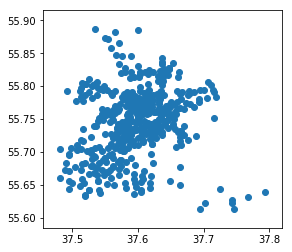

In [34]:
new_moscow_bike_rentals_normalized_gdf.plot()

In [35]:
mos_adm_gdf=gpd.read_file('../data/Moscow_Data/Moscow_Adm_Shape_Files/moscow_adm.shp')

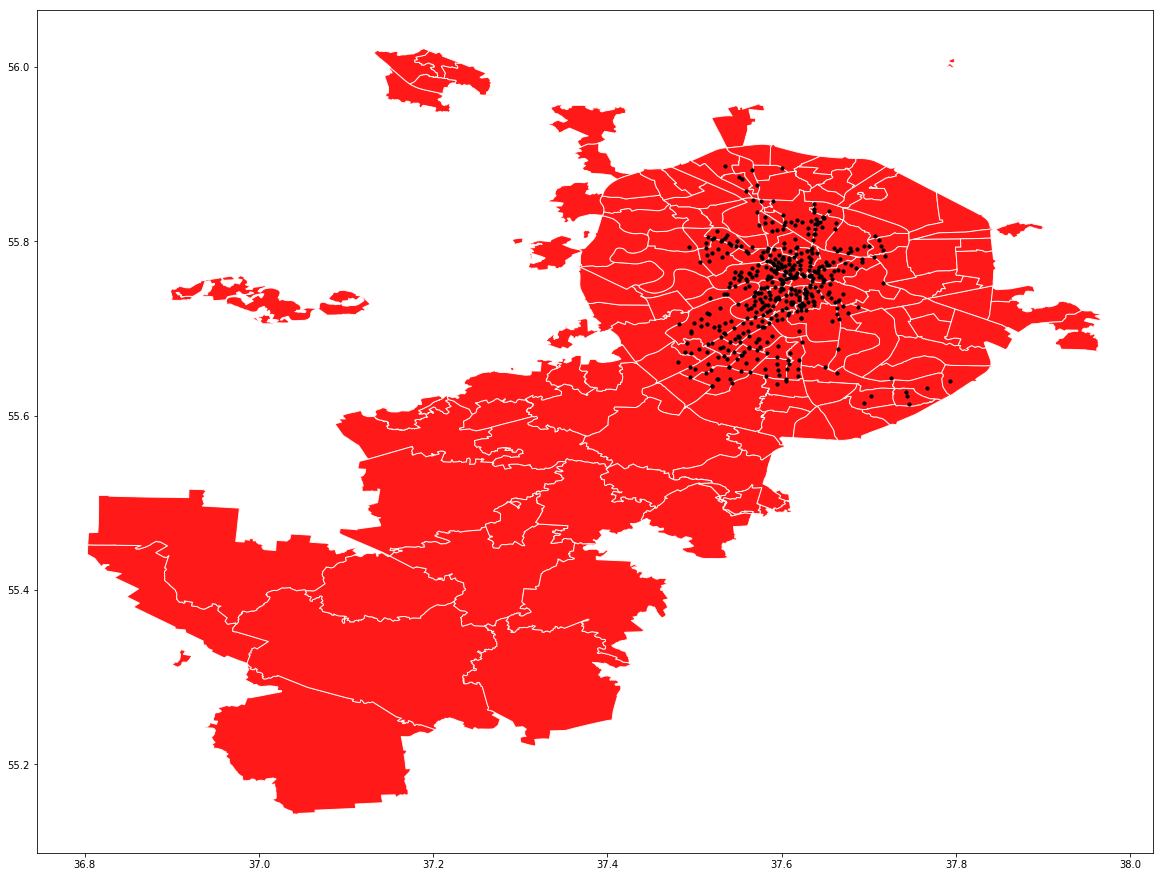

In [36]:
base=mos_adm_gdf.plot(color='red', alpha=0.9, edgecolor='white', figsize=(20,20))
new_moscow_bike_rentals_normalized_gdf.plot(ax=base, color='black', markersize=10)

Neat! I did something in Python! 

On first glance, it is clear that most of the bike rental stations are concentrated in the center of Moscow, which isn't surprising. 

This data frame needs to be saved so it can be used for further analysis.

In [37]:
new_moscow_bike_rentals_normalized_gdf.drop(columns='geodata_coordinates', inplace=True)

In [38]:
new_moscow_bike_rentals_normalized_gdf.to_file("../data/Moscow_Data/moscow_bike_rentals.geojson", driver='GeoJSON')

# Looking at Moscow Bike Parking

## The availability of bike parking is also an important part of a city's bicycle culture - if there's no place to park one's bike, then there's far less incentive to bike. 

In [39]:
moscow_bike_parking_df = pd.read_json('../data/Moscow_Data/new_moscow_bike_parking.json')

In [40]:
moscow_bike_parking_df.head(10)

,Cells,Number,global_id
0,"{'global_id': 2757725, 'ObjectOperOrgPhone_en'...",1,2757725
1,"{'global_id': 2757728, 'ObjectOperOrgPhone_en'...",2,2757728
2,"{'global_id': 2757729, 'ObjectOperOrgPhone_en'...",3,2757729
3,"{'global_id': 2757731, 'ObjectOperOrgPhone_en'...",4,2757731
4,"{'global_id': 2757733, 'ObjectOperOrgPhone_en'...",5,2757733
5,"{'global_id': 2757735, 'ObjectOperOrgPhone_en'...",6,2757735
6,"{'global_id': 2757738, 'ObjectOperOrgPhone_en'...",7,2757738
7,"{'global_id': 2757740, 'ObjectOperOrgPhone_en'...",8,2757740
8,"{'global_id': 2757741, 'ObjectOperOrgPhone_en'...",9,2757741
9,"{'global_id': 2757745, 'ObjectOperOrgPhone_en'...",10,2757745


Like last time, there is clearly a problem here, as all the data is in one column. So, we need to normalize this data.

In [41]:
moscow_bike_parking_normalized_df = json_normalize(moscow_bike_parking_df["Cells"])

In [42]:
moscow_bike_parking_normalized_df

,Address_en,AdmArea_en,Capacity_en,DepartamentalAffiliation_en,District_en,ID_en,Latitude_WGS84_en,Longitude_WGS84_en,Name_en,ObjectOperOrgName_en,ObjectOperOrgPhone_en,geoData.coordinates,geoData.type,global_id
0,"Широкая улица, дом 1А",Severo-Vostochny'j administrativny'j okrug,10,Moscow Department of transportation and develo...,rajon Severnoe Medvedkovo,32,55.889628,37.650781,Велосипедная парковка № 37124 «Гимназия № 1506»,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.650781000098, 55.889628000166]",Point,2757725
1,"Череповецкая улица, дом 10А",Severo-Vostochny'j administrativny'j okrug,10,Moscow Department of transportation and develo...,rajon Lianozovo,35,55.896533,37.570777,Велосипедная парковка № 37018 «Школа здоровья ...,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.570776999572, 55.896533000007]",Point,2757728
2,"Отрадная улица, дом 11А",Severo-Vostochny'j administrativny'j okrug,10,Moscow Department of transportation and develo...,rajon Otradnoe,36,55.857407,37.612922,Велосипедная парковка № 37106 «Центр образован...,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.612922000116, 55.857407000177]",Point,2757729
3,"Отрадная улица, дом 11Б",Severo-Vostochny'j administrativny'j okrug,10,Moscow Department of transportation and develo...,rajon Otradnoe,38,55.856873,37.613732,Велосипедная парковка № 37017 «Школа № 263»,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.613732000228, 55.856873000223]",Point,2757731
4,"Отрадная улица, дом 1А",Severo-Vostochny'j administrativny'j okrug,10,Moscow Department of transportation and develo...,rajon Otradnoe,40,55.859911,37.604736,Велосипедная парковка № 37061 «Школа № 950»,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.604735999681, 55.859910999858]",Point,2757733
5,"Алтуфьевское шоссе, дом 60Б",Severo-Vostochny'j administrativny'j okrug,10,Moscow Department of transportation and develo...,Altuf`evskij rajon,2,55.883355,37.591231,Велосипедная парковка № 37026 «Школа № 301»,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.591230999889, 55.883355000053]",Point,2757735
6,"улица Советской Армии, дом 9",Severo-Vostochny'j administrativny'j okrug,10,Moscow Department of transportation and develo...,rajon Mar`ina Roshha,5,55.789416,37.616177,Велосипедная парковка № 37085 «Школа № 1414»,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.616176999734, 55.789415999761]",Point,2757738
7,"1-й проезд Марьиной Рощи, дом 3А",Severo-Vostochny'j administrativny'j okrug,10,Moscow Department of transportation and develo...,rajon Mar`ina Roshha,7,55.793707,37.622192,Велосипедная парковка № 37004 «Школа № 242»,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.622192000299, 55.793706999946]",Point,2757740
8,"Новосущёвская улица, дом 7",Severo-Vostochny'j administrativny'j okrug,10,Moscow Department of transportation and develo...,rajon Mar`ina Roshha,8,55.787099,37.603125,Велосипедная парковка № 37158 «Спецшкола - инт...,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.603124999678, 55.787099000231]",Point,2757741
9,"Ярославская улица, дом 27",Severo-Vostochny'j administrativny'j okrug,10,Moscow Department of transportation and develo...,Alekseevskij rajon,12,55.827312,37.653290,Велосипедная парковка № 37096 «Центр образован...,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.653290000077, 55.827312000086]",Point,2757745


Much better! Now time to look at the data and see what variables matter. I am looking to see if it's the same answer in certain columns for every row, as these columns can be eliminated, and what neighborhoods in Moscow have the most bike parking. Like last time, I will also be looking for duplicates and missing data, with the magic number for the latter being 862.

In [43]:
moscow_bike_parking_normalized_df.shape

(862, 14)

In [44]:
moscow_bike_parking_normalized_df.columns

Index(['Address_en', 'AdmArea_en', 'Capacity_en',
       'DepartamentalAffiliation_en', 'District_en', 'ID_en',
       'Latitude_WGS84_en', 'Longitude_WGS84_en', 'Name_en',
       'ObjectOperOrgName_en', 'ObjectOperOrgPhone_en', 'geoData.coordinates',
       'geoData.type', 'global_id'],
      dtype='object')

In [45]:
moscow_bike_parking_normalized_df.head(10)

,Address_en,AdmArea_en,Capacity_en,DepartamentalAffiliation_en,District_en,ID_en,Latitude_WGS84_en,Longitude_WGS84_en,Name_en,ObjectOperOrgName_en,ObjectOperOrgPhone_en,geoData.coordinates,geoData.type,global_id
0,"Широкая улица, дом 1А",Severo-Vostochny'j administrativny'j okrug,10,Moscow Department of transportation and develo...,rajon Severnoe Medvedkovo,32,55.889628,37.650781,Велосипедная парковка № 37124 «Гимназия № 1506»,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.650781000098, 55.889628000166]",Point,2757725
1,"Череповецкая улица, дом 10А",Severo-Vostochny'j administrativny'j okrug,10,Moscow Department of transportation and develo...,rajon Lianozovo,35,55.896533,37.570777,Велосипедная парковка № 37018 «Школа здоровья ...,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.570776999572, 55.896533000007]",Point,2757728
2,"Отрадная улица, дом 11А",Severo-Vostochny'j administrativny'j okrug,10,Moscow Department of transportation and develo...,rajon Otradnoe,36,55.857407,37.612922,Велосипедная парковка № 37106 «Центр образован...,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.612922000116, 55.857407000177]",Point,2757729
3,"Отрадная улица, дом 11Б",Severo-Vostochny'j administrativny'j okrug,10,Moscow Department of transportation and develo...,rajon Otradnoe,38,55.856873,37.613732,Велосипедная парковка № 37017 «Школа № 263»,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.613732000228, 55.856873000223]",Point,2757731
4,"Отрадная улица, дом 1А",Severo-Vostochny'j administrativny'j okrug,10,Moscow Department of transportation and develo...,rajon Otradnoe,40,55.859911,37.604736,Велосипедная парковка № 37061 «Школа № 950»,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.604735999681, 55.859910999858]",Point,2757733
5,"Алтуфьевское шоссе, дом 60Б",Severo-Vostochny'j administrativny'j okrug,10,Moscow Department of transportation and develo...,Altuf`evskij rajon,2,55.883355,37.591231,Велосипедная парковка № 37026 «Школа № 301»,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.591230999889, 55.883355000053]",Point,2757735
6,"улица Советской Армии, дом 9",Severo-Vostochny'j administrativny'j okrug,10,Moscow Department of transportation and develo...,rajon Mar`ina Roshha,5,55.789416,37.616177,Велосипедная парковка № 37085 «Школа № 1414»,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.616176999734, 55.789415999761]",Point,2757738
7,"1-й проезд Марьиной Рощи, дом 3А",Severo-Vostochny'j administrativny'j okrug,10,Moscow Department of transportation and develo...,rajon Mar`ina Roshha,7,55.793707,37.622192,Велосипедная парковка № 37004 «Школа № 242»,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.622192000299, 55.793706999946]",Point,2757740
8,"Новосущёвская улица, дом 7",Severo-Vostochny'j administrativny'j okrug,10,Moscow Department of transportation and develo...,rajon Mar`ina Roshha,8,55.787099,37.603125,Велосипедная парковка № 37158 «Спецшкола - инт...,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.603124999678, 55.787099000231]",Point,2757741
9,"Ярославская улица, дом 27",Severo-Vostochny'j administrativny'j okrug,10,Moscow Department of transportation and develo...,Alekseevskij rajon,12,55.827312,37.653290,Велосипедная парковка № 37096 «Центр образован...,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.653290000077, 55.827312000086]",Point,2757745


In [46]:
moscow_bike_parking_normalized_df.tail(10)

,Address_en,AdmArea_en,Capacity_en,DepartamentalAffiliation_en,District_en,ID_en,Latitude_WGS84_en,Longitude_WGS84_en,Name_en,ObjectOperOrgName_en,ObjectOperOrgPhone_en,geoData.coordinates,geoData.type,global_id
852,"Алтуфьевское шоссе, дом 30А",Severo-Vostochny'j administrativny'j okrug,1,Moscow Department of transportation and develo...,rajon Otradnoe,2793,55.865871,37.5855062,Велосипедная парковка № 080000310052,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.585506200077, 55.865871000011]",Point,282199953
853,"Алтуфьевское шоссе, дом 94",Severo-Vostochny'j administrativny'j okrug,1,Moscow Department of transportation and develo...,rajon Bibirevo,2796,55.901875,37.5881983,Велосипедная парковка № 080000110052,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.588198300067, 55.901874999786]",Point,282199956
854,"Большой Сухаревский переулок, дом 2/24",Czentral`ny'j administrativny'j okrug,1,Moscow Department of transportation and develo...,Meshhanskij rajon,2818,55.7703693,37.6234392,Велосипедная парковка № 080000910972,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.623439199679, 55.770369299891]",Point,282199980
855,"улица Академика Бакулева, дом 20",Yugo-Zapadny'j administrativny'j okrug,1,Moscow Department of transportation and develo...,rajon Tyoply'j Stan,2821,55.640519,37.4735143,Велосипедная парковка № 080000110133,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.473514299906, 55.640518999966]",Point,282199983
856,"улица Петровка, дом 38",Czentral`ny'j administrativny'j okrug,1,Moscow Department of transportation and develo...,Tverskoj rajon,2327,55.770297,37.6104243,Велосипедная парковка № 080000412059,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.610424300045, 55.770297000252]",Point,282200244
857,ст. м. Третьяковская,Czentral`ny'j administrativny'j okrug,2,Moscow Department of transportation and develo...,Krasnosel`skij rajon,2531,55.7349985,37.6168854,Велосипедная парковка № 080000910820,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.6168854, 55.7349985]",Point,282200369
858,пл. Чухлинка,Yugo-Vostochny'j administrativny'j okrug,1,Moscow Department of transportation and develo...,Ryazanskij rajon,2471,55.733656,37.764292,Велосипедная парковка № 080000100154,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.764291999924, 55.733656000078]",Point,282271270
859,"Восточная улица, дом 4, корп. 1",Yuzhny'j administrativny'j okrug,1,Moscow Department of transportation and develo...,Danilovskij rajon,2503,55.7144903,37.655829,Велосипедная парковка № 080000910854,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.655829000192, 55.71449030019]",Point,282271274
860,"улица Алма-Атинская, дом9, корпус3",Yuzhny'j administrativny'j okrug,10,Moscow Department of transportation and develo...,rajon Brateevo,2790,55.639926,37.7718513,Велосипедная парковка № 080000110050,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 361-...,"[37.7718513, 55.639926]",Point,282271276
861,"Москва, Шмитовский проезд, 39",Czentral`ny'j administrativny'j okrug,16,Moscow Department of transportation and develo...,Presnenskij rajon,3001,55.75611045,37.52508949,Велосипедная парковка № 800000113546,ГКУ Центр организации дорожного движения Прави...,[{'OperationOrganizationPhone_en': '(495) 362-...,"[37.52508949, 55.75611045]",Point,933314190


Now I am going to look at the data more for patterns, missing data, and duplicates, and what columns are relevant to my analysis.

In [47]:
moscow_bike_parking_normalized_df['Address_en'].value_counts()

Хамовнический Вал, 36                                                          4
Мясницкая ул., д. 26                                                           4
«Перехватывающая парковка у метро Красногвардейская»                           3
Фрунзенская набережная, дом 50                                                 3
Воронцово поле, дом 3 строение 1                                               3
улица Соколово - Мещерская, 27                                                 2
метро «Тургеньевская», Сретенский бульвар, дом 11                              2
Мясницкая ул., д. 47                                                           2
Петровка улица, дом 19                                                         2
Петровка, 25                                                                   2
Малый Златоустинский переулок, дом 7, строение 1                               2
Енисейская улица, дом 19, строение 2                                           2
улица Арбат, дом 52, строени

Since this is bike parking, it does make sense for there to be duplicates - for instance, there probably is more than one bike corral on 1500 block on Walnut Street in Center City. However, it still needs to be checked for missing data.

In [48]:
moscow_bike_parking_normalized_df['Address_en'].value_counts(dropna=False)

Хамовнический Вал, 36                                                          4
Мясницкая ул., д. 26                                                           4
«Перехватывающая парковка у метро Красногвардейская»                           3
Фрунзенская набережная, дом 50                                                 3
Воронцово поле, дом 3 строение 1                                               3
улица Соколово - Мещерская, 27                                                 2
метро «Тургеньевская», Сретенский бульвар, дом 11                              2
Мясницкая ул., д. 47                                                           2
Петровка улица, дом 19                                                         2
Петровка, 25                                                                   2
Малый Златоустинский переулок, дом 7, строение 1                               2
Енисейская улица, дом 19, строение 2                                           2
улица Арбат, дом 52, строени

Since it is identical to the first list, there are no duplicates.

It is hard to tell much at first glance, since I am not familiar with Moscow streets. It will be much more clear when it's plotted on a map. 

In [49]:
moscow_bike_parking_normalized_df['AdmArea_en'].value_counts()

Czentral`ny'j administrativny'j okrug         221
Severo-Vostochny'j administrativny'j okrug    162
Yuzhny'j administrativny'j okrug              143
Yugo-Zapadny'j administrativny'j okrug         87
Vostochny'j administrativny'j okrug            60
Severny'j administrativny'j okrug              52
Yugo-Vostochny'j administrativny'j okrug       46
Zapadny'j administrativny'j okrug              36
Severo-Zapadny'j administrativny'j okrug       35
Zelenogradskij administrativny'j okrug         18
Novomoskovskij administrativny'j okrug          2
Name: AdmArea_en, dtype: int64

Like with bikeshare stations, almost half of the bike stations are managed by Центральный административный округ or the Central Administrative okrug. 

Now to check for missing values.

In [50]:
moscow_bike_parking_normalized_df['AdmArea_en'].value_counts(dropna=False)

Czentral`ny'j administrativny'j okrug         221
Severo-Vostochny'j administrativny'j okrug    162
Yuzhny'j administrativny'j okrug              143
Yugo-Zapadny'j administrativny'j okrug         87
Vostochny'j administrativny'j okrug            60
Severny'j administrativny'j okrug              52
Yugo-Vostochny'j administrativny'j okrug       46
Zapadny'j administrativny'j okrug              36
Severo-Zapadny'j administrativny'j okrug       35
Zelenogradskij administrativny'j okrug         18
Novomoskovskij administrativny'j okrug          2
Name: AdmArea_en, dtype: int64

There is no missing data here.

In [51]:
moscow_bike_parking_normalized_df['Capacity_en'].value_counts()

10    361
8     247
1     167
2      62
6      20
4       4
16      1
Name: Capacity_en, dtype: int64

In [52]:
moscow_bike_parking_normalized_df['Capacity_en'].value_counts(dropna=False)

10    361
8     247
1     167
2      62
6      20
4       4
16      1
Name: Capacity_en, dtype: int64

This confirms that there is no missing data in this column. It would make sense to calculate how many spots total for bike parking there is in Moscow next.

In [53]:
Bike_Parking_Total = moscow_bike_parking_normalized_df['Capacity_en'].sum()
print (Bike_Parking_Total)

6029


In [54]:
moscow_bike_parking_normalized_df['DepartamentalAffiliation_en'].value_counts()

Moscow Department of transportation and development of road transport infrastructure     862
Name: DepartamentalAffiliation_en, dtype: int64

Not surprising that all the parking is administred by Moscow's DOT.

In [55]:
moscow_bike_parking_normalized_df['District_en'].value_counts()

Basmanny'j rajon                   80
Tverskoj rajon                     33
rajon Otradnoe                     27
Krasnosel`skij rajon               22
rajon Bibirevo                     19
rajon Orexovo-Borisovo Yuzhnoe     18
Meshhanskij rajon                  17
rajon Severnoe Butovo              16
rajon Arbat                        16
Alekseevskij rajon                 15
Babushkinskij rajon                15
rajon Severnoe Medvedkovo          15
rajon Biryulyovo Vostochnoe        15
rajon Zyablikovo                   15
rajon Xamovniki                    13
rajon Yuzhnoe Butovo               13
rajon Chertanovo Yuzhnoe           12
rajon Lianozovo                    12
Taganskij rajon                    12
rajon Orexovo-Borisovo Severnoe    11
Presnenskij rajon                  11
rajon Yasenevo                     11
rajon Zamoskvorech`e               11
rajon Chertanovo Czentral`noe      10
Losinoostrovskij rajon             10
Golovinskij rajon                  10
rajon Nagati

Now to check for missing values.

In [56]:
moscow_bike_parking_normalized_df['District_en'].value_counts(dropna=False)

Basmanny'j rajon                   80
Tverskoj rajon                     33
rajon Otradnoe                     27
Krasnosel`skij rajon               22
rajon Bibirevo                     19
rajon Orexovo-Borisovo Yuzhnoe     18
Meshhanskij rajon                  17
rajon Severnoe Butovo              16
rajon Arbat                        16
Alekseevskij rajon                 15
Babushkinskij rajon                15
rajon Severnoe Medvedkovo          15
rajon Biryulyovo Vostochnoe        15
rajon Zyablikovo                   15
rajon Xamovniki                    13
rajon Yuzhnoe Butovo               13
rajon Chertanovo Yuzhnoe           12
rajon Lianozovo                    12
Taganskij rajon                    12
rajon Orexovo-Borisovo Severnoe    11
Presnenskij rajon                  11
rajon Yasenevo                     11
rajon Zamoskvorech`e               11
rajon Chertanovo Czentral`noe      10
Losinoostrovskij rajon             10
Golovinskij rajon                  10
rajon Nagati

No missing data here. Also, as seen beforehance, most of the bike parking is in the center of Moscow.

In [57]:
moscow_bike_parking_normalized_df['geoData.type'].value_counts()

Point    862
Name: geoData.type, dtype: int64

This confirms that there is no missing data in this column.

In [58]:
moscow_bike_parking_normalized_df['geoData.coordinates'].value_counts()

[37.554934000404, 55.723186200145]    4
[37.635154299999996, 55.763915]       3
[37.662996300315, 55.766927000242]    3
[37.648087300209, 55.75346799994]     3
[37.630286, 55.7615464]               2
[37.713189000265, 55.601047000106]    2
[37.613998000366, 55.76074980015]     2
[37.476985000295, 55.85464000005]     2
[37.618098300294, 55.771709800018]    2
[37.58127489973, 55.747228999839]     2
[37.620835, 55.76607]                 2
[37.395964999793, 55.800002000029]    2
[37.585458999897, 55.616765999946]    2
[37.627944900311, 55.744467000101]    2
[37.74134700007, 55.61336600005]      2
[37.622780200079, 55.759118500132]    2
[37.608612300201, 55.761581000037]    2
[37.718423999957, 55.599144000198]    2
[37.640080599912, 55.768921599885]    2
[37.60608689968, 55.752133999778]     2
[37.574657900364, 55.71867799979]     2
[37.591346299554, 55.657907999964]    2
[37.613714299823, 55.765450700031]    2
[37.642443000226, 55.880752999848]    2
[37.172752999604, 55.982757000151]    2


It makes sense for repeats to be in here, since multiple parking spots can exist in one space, but need to check if any data is missing.

In [59]:
moscow_bike_parking_normalized_df['geoData.coordinates'].value_counts(dropna=False)

[37.554934000404, 55.723186200145]    4
[37.635154299999996, 55.763915]       3
[37.662996300315, 55.766927000242]    3
[37.648087300209, 55.75346799994]     3
[37.630286, 55.7615464]               2
[37.713189000265, 55.601047000106]    2
[37.613998000366, 55.76074980015]     2
[37.476985000295, 55.85464000005]     2
[37.618098300294, 55.771709800018]    2
[37.58127489973, 55.747228999839]     2
[37.620835, 55.76607]                 2
[37.395964999793, 55.800002000029]    2
[37.585458999897, 55.616765999946]    2
[37.627944900311, 55.744467000101]    2
[37.74134700007, 55.61336600005]      2
[37.622780200079, 55.759118500132]    2
[37.608612300201, 55.761581000037]    2
[37.718423999957, 55.599144000198]    2
[37.640080599912, 55.768921599885]    2
[37.60608689968, 55.752133999778]     2
[37.574657900364, 55.71867799979]     2
[37.591346299554, 55.657907999964]    2
[37.613714299823, 55.765450700031]    2
[37.642443000226, 55.880752999848]    2
[37.172752999604, 55.982757000151]    2


There is no missing data. 

In [60]:
moscow_bike_parking_normalized_df['ObjectOperOrgName_en'].value_counts()

ГКУ Центр организации дорожного движения Правительства Москвы    862
Name: ObjectOperOrgName_en, dtype: int64

This basically just the DepartamentalAffiliation_en column but in Russian. 

In [61]:
moscow_bike_parking_normalized_df['Name_en'].value_counts()

Велосипедная парковка № 080150112581                                                1
Велосипедная парковка № 32015 «Гимназия № 1593»                                     1
Велосипедная парковка № 080000910820                                                1
Велосипедная парковка № 29003 «Центральная деткая библиотека № 110»                 1
Велосипедная парковка № 37008 «Школа № 250»                                         1
Велосипедная парковка № 39016 «Лицей № 1571 »                                       1
Велосипедная парковка № 080147110906                                                1
Велосипедная парковка № 37005 «Школа № 245»                                         1
Велосипедная парковка № 080000910813                                                1
Велосипедная парковка № 34068 «Школа № 880»                                         1
Велосипедная парковка № 080150111111                                                1
Велосипедная парковка № 080150210832                  

No missing data or duplicates.

In [62]:
moscow_bike_parking_normalized_df['global_id'].value_counts()

19646462     1
25211536     1
25211534     1
25211530     1
167606921    1
19645923     1
25211527     1
167606683    1
25211525     1
167606916    1
22950190     1
25211522     1
167606913    1
25211520     1
25211517     1
25211516     1
167606907    1
167606903    1
167606902    1
167606901    1
25211508     1
25211507     1
19645667     1
19645666     1
14021230     1
167606927    1
25211537     1
25211498     1
25211538     1
167606919    1
            ..
37401927     1
2757958      1
2757957      1
62879060     1
2757984      1
2757985      1
2758001      1
2758019      1
19645654     1
2758016      1
2758015      1
2758014      1
63061372     1
2758010      1
2758008      1
2758006      1
282199221    1
63061359     1
2757986      1
2758091      1
2757997      1
2757994      1
2757993      1
2757992      1
62879082     1
19645695     1
2757989      1
2757988      1
2757987      1
19646464     1
Name: global_id, Length: 862, dtype: int64

No missing data.

Based on this data exploration, we know certain columns aren't relevant in analyzing the data more in depth, as it is the same for each row, or not useful in analyzing bicycle culture in Moscow. Therefore, we will need to subset the data to create a cleaner, more relevant data table.

In [63]:
new_moscow_bike_parking_normalized_df = moscow_bike_parking_normalized_df[['AdmArea_en', 'geoData.coordinates']]

In [64]:
new_moscow_bike_parking_normalized_df

,AdmArea_en,geoData.coordinates
0,Severo-Vostochny'j administrativny'j okrug,"[37.650781000098, 55.889628000166]"
1,Severo-Vostochny'j administrativny'j okrug,"[37.570776999572, 55.896533000007]"
2,Severo-Vostochny'j administrativny'j okrug,"[37.612922000116, 55.857407000177]"
3,Severo-Vostochny'j administrativny'j okrug,"[37.613732000228, 55.856873000223]"
4,Severo-Vostochny'j administrativny'j okrug,"[37.604735999681, 55.859910999858]"
5,Severo-Vostochny'j administrativny'j okrug,"[37.591230999889, 55.883355000053]"
6,Severo-Vostochny'j administrativny'j okrug,"[37.616176999734, 55.789415999761]"
7,Severo-Vostochny'j administrativny'j okrug,"[37.622192000299, 55.793706999946]"
8,Severo-Vostochny'j administrativny'j okrug,"[37.603124999678, 55.787099000231]"
9,Severo-Vostochny'j administrativny'j okrug,"[37.653290000077, 55.827312000086]"


In [65]:
new_moscow_bike_parking_normalized_df.shape

(862, 2)

In [66]:
new_moscow_bike_parking_normalized_df.columns

Index(['AdmArea_en', 'geoData.coordinates'], dtype='object')

Some of the column names are a bit confusing - hence, we are going to re-name the columns to provide more clarity.

In [67]:
new_moscow_bike_parking_normalized_df.columns=['Administrative_Area', 'geodata_coordinates']
  

In [68]:
new_moscow_bike_parking_normalized_df

,Administrative_Area,geodata_coordinates
0,Severo-Vostochny'j administrativny'j okrug,"[37.650781000098, 55.889628000166]"
1,Severo-Vostochny'j administrativny'j okrug,"[37.570776999572, 55.896533000007]"
2,Severo-Vostochny'j administrativny'j okrug,"[37.612922000116, 55.857407000177]"
3,Severo-Vostochny'j administrativny'j okrug,"[37.613732000228, 55.856873000223]"
4,Severo-Vostochny'j administrativny'j okrug,"[37.604735999681, 55.859910999858]"
5,Severo-Vostochny'j administrativny'j okrug,"[37.591230999889, 55.883355000053]"
6,Severo-Vostochny'j administrativny'j okrug,"[37.616176999734, 55.789415999761]"
7,Severo-Vostochny'j administrativny'j okrug,"[37.622192000299, 55.793706999946]"
8,Severo-Vostochny'j administrativny'j okrug,"[37.603124999678, 55.787099000231]"
9,Severo-Vostochny'j administrativny'j okrug,"[37.653290000077, 55.827312000086]"


Now I need to save this cleaned up dataframe for further analysis.

In [69]:
new_moscow_bike_parking_normalized_df.to_csv("../data/Moscow_Data/clean_moscow_bike_parking.csv")

Now, in order to get a better sense of this data, it should be plotted on map. This will require me to turn this data frame into a geodata frame.

In [70]:
new_moscow_bike_parking_normalized_df['geometry.lat'] = new_moscow_bike_parking_normalized_df['geodata_coordinates'].apply(lambda x: pd.Series(x[0]))

new_moscow_bike_parking_normalized_df['geometry.long'] = new_moscow_bike_parking_normalized_df['geodata_coordinates'].apply(lambda x: pd.Series(x[1]))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [71]:
moscow_bike_parking_gdf=gpd.GeoDataFrame(new_moscow_bike_parking_normalized_df, 
                 geometry=gpd.points_from_xy(new_moscow_bike_parking_normalized_df['geometry.lat'], 
                  new_moscow_bike_parking_normalized_df['geometry.long']))

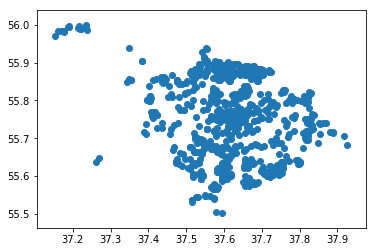

In [72]:
moscow_bike_parking_gdf.plot()

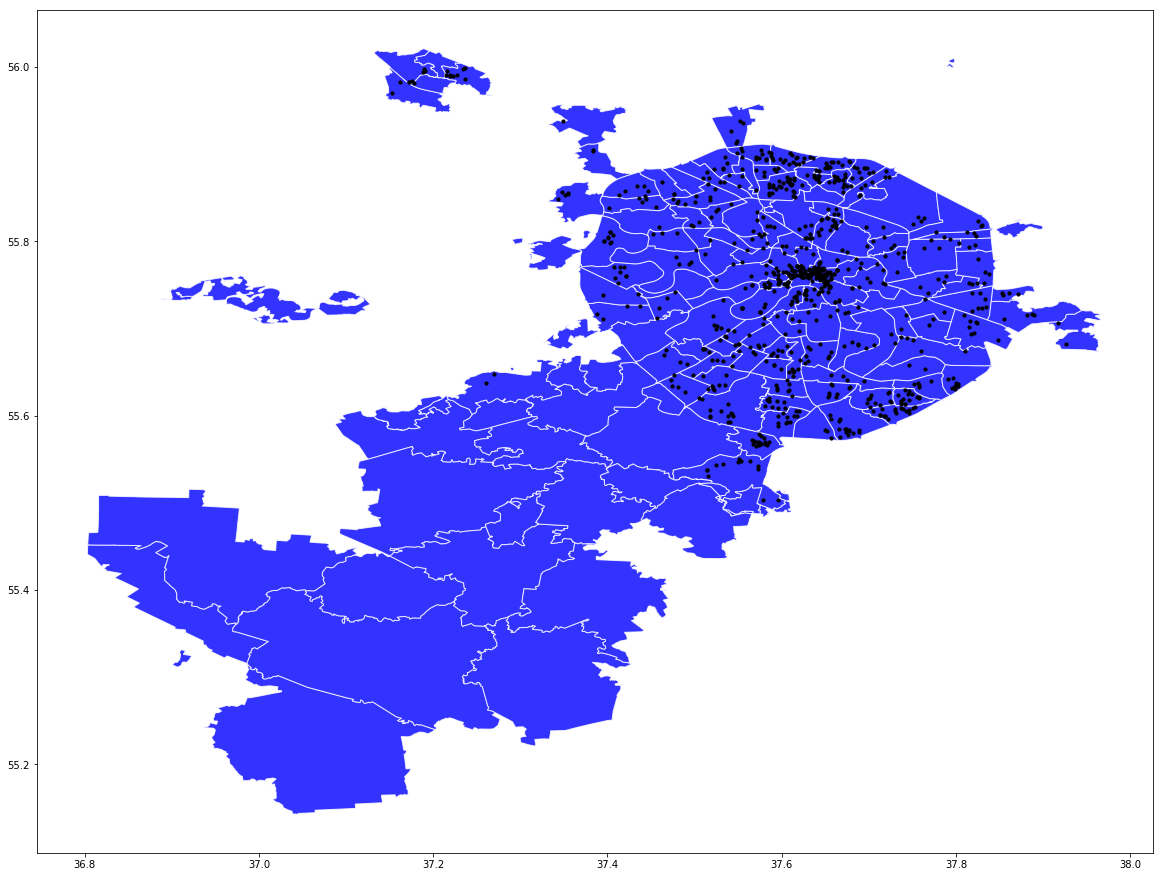

In [73]:
base=mos_adm_gdf.plot(color='blue', alpha=0.8, edgecolor='white', figsize=(20,20))
moscow_bike_parking_gdf.plot(ax=base, color='black', markersize=10)

I need to save this geodata frame to use it for further analysis.

In [74]:
# need to drop the geodata_coordinates column before saving as a geojson file
moscow_bike_parking_gdf.drop(columns='geodata_coordinates', inplace=True)

In [75]:
moscow_bike_parking_gdf.to_file("../data/Moscow_Data/moscow_bike_parking.geojson", driver='GeoJSON')

# Looking at Moscow Bike Lanes

## One of the most critical aspects of bicycle culture is bike lanes, as this has been shown to be the best for drivers, pedestrians, and cyclists. 

In [76]:
moscow_bike_lanes_df = pd.read_json('../data/Moscow_Data/new_moscow_bike_lanes.json')

In [77]:
moscow_bike_lanes_df 

,Cells,Number,global_id
0,"{'global_id': 660599284, 'ID_en': 11, 'Name_en...",1,660599284
1,"{'global_id': 860145501, 'ID_en': 35, 'Name_en...",2,860145501
2,"{'global_id': 660584272, 'ID_en': 8, 'Name_en'...",3,660584272
3,"{'global_id': 859835758, 'ID_en': 9, 'Name_en'...",4,859835758
4,"{'global_id': 860363093, 'ID_en': 1, 'Name_en'...",5,860363093
5,"{'global_id': 59678455, 'ID_en': 11, 'Name_en'...",6,59678455
6,"{'global_id': 861509421, 'ID_en': 1421, 'Name_...",7,861509421
7,"{'global_id': 861394970, 'ID_en': 1064, 'Name_...",8,861394970
8,"{'global_id': 860416691, 'ID_en': 5, 'Name_en'...",9,860416691
9,"{'global_id': 860425796, 'ID_en': 7, 'Name_en'...",10,860425796


Again, there is clearly a problem here, as all the data is in one column. So, we need to normalize this data.

In [78]:
moscow_bike_lanes_normalized_df = json_normalize(moscow_bike_lanes_df["Cells"])

In [79]:
moscow_bike_lanes_normalized_df

,DepartamentalAffiliation_en,ID_en,Location_en,Name_en,ObjectOperOrgPhone_en,OperOrgName_en,PortionName_en,Type_en,Width_en,geoData.coordinates,geoData.type,global_id
0,Moscow Department of housing and communal serv...,11,"ТиНАО, посел. Первомайское, М-3 Украина- г.Тро...",А/д Боровское шоссе – Киевское шоссе – д. Бота...,(495) 940-06-94,ГБУ Автомобильные дороги,"ТиНАО, посел. Первомайское, М-3 Украина- г.Тро...","[, , ]",1.8,"[[[37.157132239276, 55.549413245372], [37.1561...",MultiLineString,660599284
1,Moscow Department of culture,35,"улица Крымский Вал, дом 9","Андреевская набережная, Природный заказник «Во...",(495) 995-00-20,Государственное автономное учреждение культуры...,None,[],1.5,"[[[37.55852194817532, 55.709525418221176], [37...",MultiLineString,860145501
2,Moscow Department of housing and communal serv...,8,Арбатская площадь,Арбатская площадь,(495) 940-06-94,ГБУ Автомобильные дороги,Площадь арбатская,"[, , ]",1.2,"[[[37.600506884173, 55.752788849066], [37.6004...",MultiLineString,660584272
3,Prefecture of North-Eastern Administrative ...,9,от Олонецкой улицы дом 15Б до Березовой аллеи ...,Березовая аллея,(495) 708-44-69,Государственное бюджетное учреждение города Мо...,None,[],1.0,"[[[37.616323092814, 55.852861584692], [37.6143...",MultiLineString,859835758
4,Prefecture of Northern Administrative Okrug o...,1,Бескудниковский район,Бескудниковский бульвар (озелененная часть),(499) 487-04-90,Государственное бюджетное учреждение Жилищник ...,Бескудниковский бульвар (озелененная часть),[],2.5,"[[[37.562031696518, 55.857838993942], [37.5619...",MultiLineString,860363093
5,Moscow Department of natural resources and env...,11,в границах Бирюлевского дендропарка,Бирюлевский дендропарк,(499) 739-27-05,ГПБУ Мосприрода,"Улица Липецкая, дом 28 (напротив)",[],1.5,"[[[37.674492552067, 55.591772596096], [37.6753...",MultiLineString,59678455
6,Moscow Department of housing and communal serv...,1421,Боровское шоссе,Боровское шоссе,(495) 940-06-94,ГБУ Автомобильные дороги,Боровское шоссе,[],1.2,"[[[37.426839485168, 55.661478955512], [37.4245...",MultiLineString,861509421
7,Prefecture of Central Administrative Okrug of ...,1064,Бронная М. ул.,Бронная М. ул.,(495) 670-02-60,ГБУ Автомобильные дороги ЦАО,Бронная М. ул.,"[, , ]",1.2,"[[[37.598575963974, 55.758676633124], [37.5980...",MultiLineString,861394970
8,Prefecture of Northern Administrative Okrug o...,5,"Большая Академическая улица, дом 8-10",Велодорожка,(985) 640-80-67,ДЭУ-2 ГБУ Автомобильные дороги САО,Велодорожка,[],2.1,"[[[37.524074069656, 55.819056569455], [37.5250...",MultiLineString,860416691
9,Prefecture of Northern Administrative Okrug o...,7,"Большая Академическая улица, дом 14",Велодорожка (в зоне озеленения),(985) 640-80-67,ДЭУ-2 ГБУ Автомобильные дороги САО,Велодорожка (в зоне озеленения),[],2.1,"[[[37.526169035299, 55.8213216591], [37.526598...",MultiLineString,860425796


Much better! Now time to look at the data and see what variables matter. I am looking to see if it's the same answer in certain columns for every row, as these columns can be eliminated, and what neighborhoods in Moscow have the most bike rental stations. I am also looking for duplicates and missing data, with the magic number for the latter being 135.

In [80]:
moscow_bike_lanes_normalized_df.shape

(135, 12)

In [81]:
moscow_bike_lanes_normalized_df.head(10)

,DepartamentalAffiliation_en,ID_en,Location_en,Name_en,ObjectOperOrgPhone_en,OperOrgName_en,PortionName_en,Type_en,Width_en,geoData.coordinates,geoData.type,global_id
0,Moscow Department of housing and communal serv...,11,"ТиНАО, посел. Первомайское, М-3 Украина- г.Тро...",А/д Боровское шоссе – Киевское шоссе – д. Бота...,(495) 940-06-94,ГБУ Автомобильные дороги,"ТиНАО, посел. Первомайское, М-3 Украина- г.Тро...","[, , ]",1.8,"[[[37.157132239276, 55.549413245372], [37.1561...",MultiLineString,660599284
1,Moscow Department of culture,35,"улица Крымский Вал, дом 9","Андреевская набережная, Природный заказник «Во...",(495) 995-00-20,Государственное автономное учреждение культуры...,None,[],1.5,"[[[37.55852194817532, 55.709525418221176], [37...",MultiLineString,860145501
2,Moscow Department of housing and communal serv...,8,Арбатская площадь,Арбатская площадь,(495) 940-06-94,ГБУ Автомобильные дороги,Площадь арбатская,"[, , ]",1.2,"[[[37.600506884173, 55.752788849066], [37.6004...",MultiLineString,660584272
3,Prefecture of North-Eastern Administrative ...,9,от Олонецкой улицы дом 15Б до Березовой аллеи ...,Березовая аллея,(495) 708-44-69,Государственное бюджетное учреждение города Мо...,None,[],1.0,"[[[37.616323092814, 55.852861584692], [37.6143...",MultiLineString,859835758
4,Prefecture of Northern Administrative Okrug o...,1,Бескудниковский район,Бескудниковский бульвар (озелененная часть),(499) 487-04-90,Государственное бюджетное учреждение Жилищник ...,Бескудниковский бульвар (озелененная часть),[],2.5,"[[[37.562031696518, 55.857838993942], [37.5619...",MultiLineString,860363093
5,Moscow Department of natural resources and env...,11,в границах Бирюлевского дендропарка,Бирюлевский дендропарк,(499) 739-27-05,ГПБУ Мосприрода,"Улица Липецкая, дом 28 (напротив)",[],1.5,"[[[37.674492552067, 55.591772596096], [37.6753...",MultiLineString,59678455
6,Moscow Department of housing and communal serv...,1421,Боровское шоссе,Боровское шоссе,(495) 940-06-94,ГБУ Автомобильные дороги,Боровское шоссе,[],1.2,"[[[37.426839485168, 55.661478955512], [37.4245...",MultiLineString,861509421
7,Prefecture of Central Administrative Okrug of ...,1064,Бронная М. ул.,Бронная М. ул.,(495) 670-02-60,ГБУ Автомобильные дороги ЦАО,Бронная М. ул.,"[, , ]",1.2,"[[[37.598575963974, 55.758676633124], [37.5980...",MultiLineString,861394970
8,Prefecture of Northern Administrative Okrug o...,5,"Большая Академическая улица, дом 8-10",Велодорожка,(985) 640-80-67,ДЭУ-2 ГБУ Автомобильные дороги САО,Велодорожка,[],2.1,"[[[37.524074069656, 55.819056569455], [37.5250...",MultiLineString,860416691
9,Prefecture of Northern Administrative Okrug o...,7,"Большая Академическая улица, дом 14",Велодорожка (в зоне озеленения),(985) 640-80-67,ДЭУ-2 ГБУ Автомобильные дороги САО,Велодорожка (в зоне озеленения),[],2.1,"[[[37.526169035299, 55.8213216591], [37.526598...",MultiLineString,860425796


In [82]:
moscow_bike_lanes_normalized_df.tail(10)

,DepartamentalAffiliation_en,ID_en,Location_en,Name_en,ObjectOperOrgPhone_en,OperOrgName_en,PortionName_en,Type_en,Width_en,geoData.coordinates,geoData.type,global_id
125,Prefecture of Troitsky and Novomoskovsky Admin...,3,"г. Москва, г. Троицк, ул. Солнечная",велодорожка вдоль ул. Солнечная г. Троицк,(926) 095-83-50,Муниципальное бюджетное учреждение «Дорожное х...,None,[],2.3,"[[[37.293528983774, 55.46605554304], [37.29256...",MultiLineString,859856960
126,Moscow Department of natural resources and env...,8,от улицы Островитянова до зоны отдыха Тропарево,ландшафтный заказник Теплый Стан,(499) 739-27-05,ГПБУ Мосприрода,От улицы Островитянова до зоны отдыха Тропарево\n,[],1.5,"[[[37.509008335332, 55.635462013003], [37.5085...",MultiLineString,19616656
127,Moscow Department of natural resources and env...,6,от улицы Миклухо Маклая до микрорайона Северно...,парк Битцевский лес,(499) 739-27-05,ГПБУ Мосприрода,От улицы Миклухо Маклая до микрорайона Северно...,[],1.5,"[[[37.587294561492, 55.633472793859], [37.5862...",MultiLineString,19616631
128,Moscow Department of natural resources and env...,7,"МКАД, 36 км, внешняя сторона",парк Битцевский лес,(499) 739-27-05,ГПБУ Мосприрода,"МКАД, 36 км, внешняя сторона\n",[],1.5,"[[[37.550322359214, 55.585538032951], [37.5501...",MultiLineString,19616642
129,Moscow Department of natural resources and env...,9,в границах природно-исторического парка Измайлово,парк Измайлово,(499) 739-27-05,ГПБУ Мосприрода,в границах природно-исторического парка Измайлово,[],1.5,"[[[37.769413303617, 55.763479803016], [37.7704...",MultiLineString,25192301
130,Moscow Department of natural resources and env...,10,в границах природно-исторического парка Кузьми...,парк Кузьминки-Люблино,(495) 940-06-94,ГБУ Автомобильные дороги по ЮВАО,От улицы Люблинская до улицы Краснодонская,[],1.5,"[[[37.735543099174, 55.692060303928], [37.7359...",MultiLineString,59677361
131,Moscow Department of natural resources and env...,5,на территории лесопарка Кусково,парк Кусково,(499) 739-27-05,ГПБУ Мосприрода,объект природного комплекса № 80\n,[],1.5,"[[[37.797466123205, 55.73909179932], [37.78205...",MultiLineString,19616620
132,Moscow Department of natural resources and env...,4,от Иваньковского шоссе до Никольского тупика,парк Покровское-Стрешнево,(499) 739-27-05,ГПБУ Мосприрода,от Иваньковского шоссе до Никольского тупика,[],3.1,"[[[37.464787547807, 55.822981114548], [37.4659...",MultiLineString,19616611
133,Moscow Department of housing and communal serv...,12348,"микрорайон Ленинские Горы, дом 1 строение 43 -...",улица Академика Хохлова,(495) 940-06-94,ГБУ Автомобильные дороги,Академика Хохлова улица (проспект Вернадского ...,[],1.8,"[[[37.529836090055, 55.701943995044], [37.5396...",MultiLineString,19639311
134,Prefecture of South-Western Administrative O...,1,улица Миклухо-Маклая,улица Миклухо-Маклая,(499) 128-17-63,Государственное бюджетное учреждение «Автомоби...,None,[],2.3,"[[[37.527008490529, 55.642538099705], [37.5287...",MultiLineString,860061510


In [83]:
moscow_bike_lanes_normalized_df.columns

Index(['DepartamentalAffiliation_en', 'ID_en', 'Location_en', 'Name_en',
       'ObjectOperOrgPhone_en', 'OperOrgName_en', 'PortionName_en', 'Type_en',
       'Width_en', 'geoData.coordinates', 'geoData.type', 'global_id'],
      dtype='object')

In [84]:
moscow_bike_lanes_normalized_df['DepartamentalAffiliation_en'].value_counts()

Prefecture of Central Administrative Okrug of Moscow                        28
Moscow Department of culture                                                22
Prefecture of Northern  Administrative Okrug of Moscow                      18
Moscow Department of housing and communal services and improvement          13
Moscow Department of natural resources and environmental protection         12
Prefecture of Western   Administrative Okrug of Moscow                      10
Prefecture of North-Eastern    Administrative Okrug of Moscow                7
Prefecture of North-Western   Administrative Okrug of Moscow                 7
Prefecture of Eastern    Administrative Okrug of Moscow                      6
Prefecture of Troitsky and Novomoskovsky Administrative Okrugs of Moscow     4
Prefecture of South-Eastern Administrative Okrug of Moscow                   4
Prefecture of Southern Administrative Okrug of Moscow                        2
Prefecture of South-Western   Administrative Okrug o

These prefectures are the administrative bodies for neighborhoods in Moscow, which is important in my analysis of bicycle culture, because it explains how bicycle infrastructure works. Now just need to check for missing data. 

In [85]:
moscow_bike_lanes_normalized_df['DepartamentalAffiliation_en'].value_counts(dropna=False)

Prefecture of Central Administrative Okrug of Moscow                        28
Moscow Department of culture                                                22
Prefecture of Northern  Administrative Okrug of Moscow                      18
Moscow Department of housing and communal services and improvement          13
Moscow Department of natural resources and environmental protection         12
Prefecture of Western   Administrative Okrug of Moscow                      10
Prefecture of North-Eastern    Administrative Okrug of Moscow                7
Prefecture of North-Western   Administrative Okrug of Moscow                 7
Prefecture of Eastern    Administrative Okrug of Moscow                      6
Prefecture of Troitsky and Novomoskovsky Administrative Okrugs of Moscow     4
Prefecture of South-Eastern Administrative Okrug of Moscow                   4
Prefecture of Southern Administrative Okrug of Moscow                        2
Prefecture of South-Western   Administrative Okrug o

Since these two results are identical, there is no missing data.

In [86]:
moscow_bike_lanes_normalized_df['Location_en'].value_counts()

Район Ивановское                                                                                    2
улица Крымский Вал, дом 9                                                                           2
Трубная площадь                                                                                     1
г. Москва, г. Троицк, ул. Октябрьский проспект                                                      1
Пятницкое шоссе от д.7 до д.23                                                                      1
Большая Академическая улица, дом 14                                                                 1
ул. Героев Панфиловцев, д. 22, корп. 1                                                              1
от Олонецкой улицы дом 15Б до Березовой аллеи дом 7                                                 1
Сретенский б-р                                                                                      1
от улицы Миклухо Маклая до микрорайона Северное Чертаново                         

There are two duplicates here, though no data is missing. It would make sense for duplicates for something like a bike lane. 

In [87]:
moscow_bike_lanes_normalized_df['Name_en'].value_counts()

Велосипедная дорожка                                                                                                             7
парк Битцевский лес                                                                                                              2
Долина реки Сетунь                                                                                                               2
Пятницкая ул.                                                                                                                    1
Велосипедная дорожка в парке им. Артема Боровика                                                                                 1
Пушкинская набережная, Парк Горького                                                                                             1
Пойма реки Яуза вдоль Северодвинской улицы                                                                                       1
Велосипедная дорожка на бульварной зоне по Пятницкому шоссе                        

There are 7 bike lanes called Велосипедная дорожка, which translates to bike lane. How creative! Given this, I am just going to use the global_id for the bike lanes.

In [88]:
moscow_bike_lanes_normalized_df['OperOrgName_en'].value_counts()

ГБУ Автомобильные дороги ЦАО                                                                                                                                                           28
ДЭУ-2 ГБУ Автомобильные дороги САО                                                                                                                                                     15
ГБУ Автомобильные дороги                                                                                                                                                               13
ГПБУ Мосприрода                                                                                                                                                                        11
ГБУ Автомобильные дороги ЗАО                                                                                                                                                            6
Государственное автономное учреждение культуры города Москвы «Централь

This is basically the Departamental_Affilitation column but in Russian, so I won't be using it.

In [89]:
moscow_bike_lanes_normalized_df['PortionName_en'].value_counts()

Пятницкая ул.                                                                       1
Никитская М. ул.                                                                    1
Никитский б-р                                                                       1
Неглинная ул.                                                                       1
Измайловский проспект                                                               1
Боровское шоссе                                                                     1
Путинковский Б. пер.                                                                1
Велодорожка в Ивановском лесопарке                                                  1
Вдоль Шипиловского проезда от дома 49 до дома 69 (напротив)                         1
Тверской б-р                                                                        1
Чистопрудный б-р                                                                    1
Велосипедная дорожка вблизи дома 51                   

Lot of missing data here, so will not use for data analysis.

In [90]:
moscow_bike_lanes_normalized_df['Type_en'].value_counts()

[]        87
[, ]      28
[, , ]    20
Name: Type_en, dtype: int64

I only looked at this in case something came up, but given the results here, I know I won't use this in my analysis.

In [91]:
moscow_bike_lanes_normalized_df['Width_en'].value_counts()

1.5    29
1.2    25
2.5    16
2.0    16
2.1    15
1.0     8
1.8     5
3.0     3
2.3     3
3.5     3
2.4     2
1.1     2
1.6     2
3.1     1
0.7     1
1.3     1
0.8     1
5.4     1
2.2     1
Name: Width_en, dtype: int64

It's fascinating that there are a variety of different lengths, and that this is even noted in the data set. However, it's not really relevant in my analysis, especially since I don't have this data about Philly's bike lanes.

Based on this data exploration, we know the following isn't relevant in analyzing the data more in depth, as it is the same for each row, or not useful in analyzing bicycle culture in Moscow.

* ObjectOperOrgPhone_en
* Type_en
* geoData.type
* OperOrgName_en
* ID_en
* PortionName_en
* Name_en
* Width_en


Therefore, we will need to subset the data to create a cleaner, more relevant data table.

In [92]:
new_moscow_bike_lanes_normalized_df = moscow_bike_lanes_normalized_df[['global_id', 'DepartamentalAffiliation_en', 
                                                                       'Location_en', 'geoData.coordinates']]

In [93]:
new_moscow_bike_lanes_normalized_df

,global_id,DepartamentalAffiliation_en,Location_en,geoData.coordinates
0,660599284,Moscow Department of housing and communal serv...,"ТиНАО, посел. Первомайское, М-3 Украина- г.Тро...","[[[37.157132239276, 55.549413245372], [37.1561..."
1,860145501,Moscow Department of culture,"улица Крымский Вал, дом 9","[[[37.55852194817532, 55.709525418221176], [37..."
2,660584272,Moscow Department of housing and communal serv...,Арбатская площадь,"[[[37.600506884173, 55.752788849066], [37.6004..."
3,859835758,Prefecture of North-Eastern Administrative ...,от Олонецкой улицы дом 15Б до Березовой аллеи ...,"[[[37.616323092814, 55.852861584692], [37.6143..."
4,860363093,Prefecture of Northern Administrative Okrug o...,Бескудниковский район,"[[[37.562031696518, 55.857838993942], [37.5619..."
5,59678455,Moscow Department of natural resources and env...,в границах Бирюлевского дендропарка,"[[[37.674492552067, 55.591772596096], [37.6753..."
6,861509421,Moscow Department of housing and communal serv...,Боровское шоссе,"[[[37.426839485168, 55.661478955512], [37.4245..."
7,861394970,Prefecture of Central Administrative Okrug of ...,Бронная М. ул.,"[[[37.598575963974, 55.758676633124], [37.5980..."
8,860416691,Prefecture of Northern Administrative Okrug o...,"Большая Академическая улица, дом 8-10","[[[37.524074069656, 55.819056569455], [37.5250..."
9,860425796,Prefecture of Northern Administrative Okrug o...,"Большая Академическая улица, дом 14","[[[37.526169035299, 55.8213216591], [37.526598..."


In [94]:
new_moscow_bike_lanes_normalized_df.shape

(135, 4)

In [95]:
new_moscow_bike_lanes_normalized_df.columns

Index(['global_id', 'DepartamentalAffiliation_en', 'Location_en',
       'geoData.coordinates'],
      dtype='object')

Some of the column names are a bit wordy - hence, we are going to re-name the columns to provide more clarity.

In [96]:
new_moscow_bike_lanes_normalized_df.columns=['global_id', 'Departamental_Affiliation', 'Location', 'geodata_coordinates']

In [97]:
new_moscow_bike_lanes_normalized_df

,global_id,Departamental_Affiliation,Location,geodata_coordinates
0,660599284,Moscow Department of housing and communal serv...,"ТиНАО, посел. Первомайское, М-3 Украина- г.Тро...","[[[37.157132239276, 55.549413245372], [37.1561..."
1,860145501,Moscow Department of culture,"улица Крымский Вал, дом 9","[[[37.55852194817532, 55.709525418221176], [37..."
2,660584272,Moscow Department of housing and communal serv...,Арбатская площадь,"[[[37.600506884173, 55.752788849066], [37.6004..."
3,859835758,Prefecture of North-Eastern Administrative ...,от Олонецкой улицы дом 15Б до Березовой аллеи ...,"[[[37.616323092814, 55.852861584692], [37.6143..."
4,860363093,Prefecture of Northern Administrative Okrug o...,Бескудниковский район,"[[[37.562031696518, 55.857838993942], [37.5619..."
5,59678455,Moscow Department of natural resources and env...,в границах Бирюлевского дендропарка,"[[[37.674492552067, 55.591772596096], [37.6753..."
6,861509421,Moscow Department of housing and communal serv...,Боровское шоссе,"[[[37.426839485168, 55.661478955512], [37.4245..."
7,861394970,Prefecture of Central Administrative Okrug of ...,Бронная М. ул.,"[[[37.598575963974, 55.758676633124], [37.5980..."
8,860416691,Prefecture of Northern Administrative Okrug o...,"Большая Академическая улица, дом 8-10","[[[37.524074069656, 55.819056569455], [37.5250..."
9,860425796,Prefecture of Northern Administrative Okrug o...,"Большая Академическая улица, дом 14","[[[37.526169035299, 55.8213216591], [37.526598..."


In [98]:
new_moscow_bike_lanes_normalized_df.columns

Index(['global_id', 'Departamental_Affiliation', 'Location',
       'geodata_coordinates'],
      dtype='object')

I need to save this for future analysis.

In [99]:
new_moscow_bike_lanes_normalized_df.to_csv("../data/Moscow_Data/clean_moscow_bike_lanes.csv")

Now, in order to get a better sense of this data, it should be plotted on map. This will require me to turn this data frame into a geodata frame.

<div class="alert alert-info">
    <h3>Bike lanes</h3>
    <li>the lanes are a series of x,y points making up a path so it is a bit more involved.</li>
    <li>This function will create the appropriate Shapely <code>LineString</code> object</li>
</div>

In [100]:
def create_line_geom(coords):
    '''
    function to convert list of points, e.g.
        [[37.157132239276, 55.549413245372],
         [37.156178327272, 55.547646225529],
         [37.156360717485, 55.546946718418],
         ...
    into a Shapely Linestring object for a Geopandas data frame
    
    1. process list of pairs and turn into Points
    2. add each point to a linestring object
    '''
    xpoints = [x for x,y in coords[0]]
    ypoints = [y for x,y in coords[0]]
    points = gpd.points_from_xy(xpoints, ypoints)
    if len(points)==1:
        return points[0]
    else:
        return LineString(points)


In [101]:
path_geom = new_moscow_bike_lanes_normalized_df['geodata_coordinates'].apply(create_line_geom)

In [102]:
new_moscow_bike_lanes_normalized_gdf=gpd.GeoDataFrame(new_moscow_bike_lanes_normalized_df, 
                 geometry=path_geom)

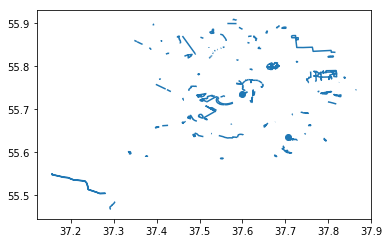

In [103]:
new_moscow_bike_lanes_normalized_gdf.plot()

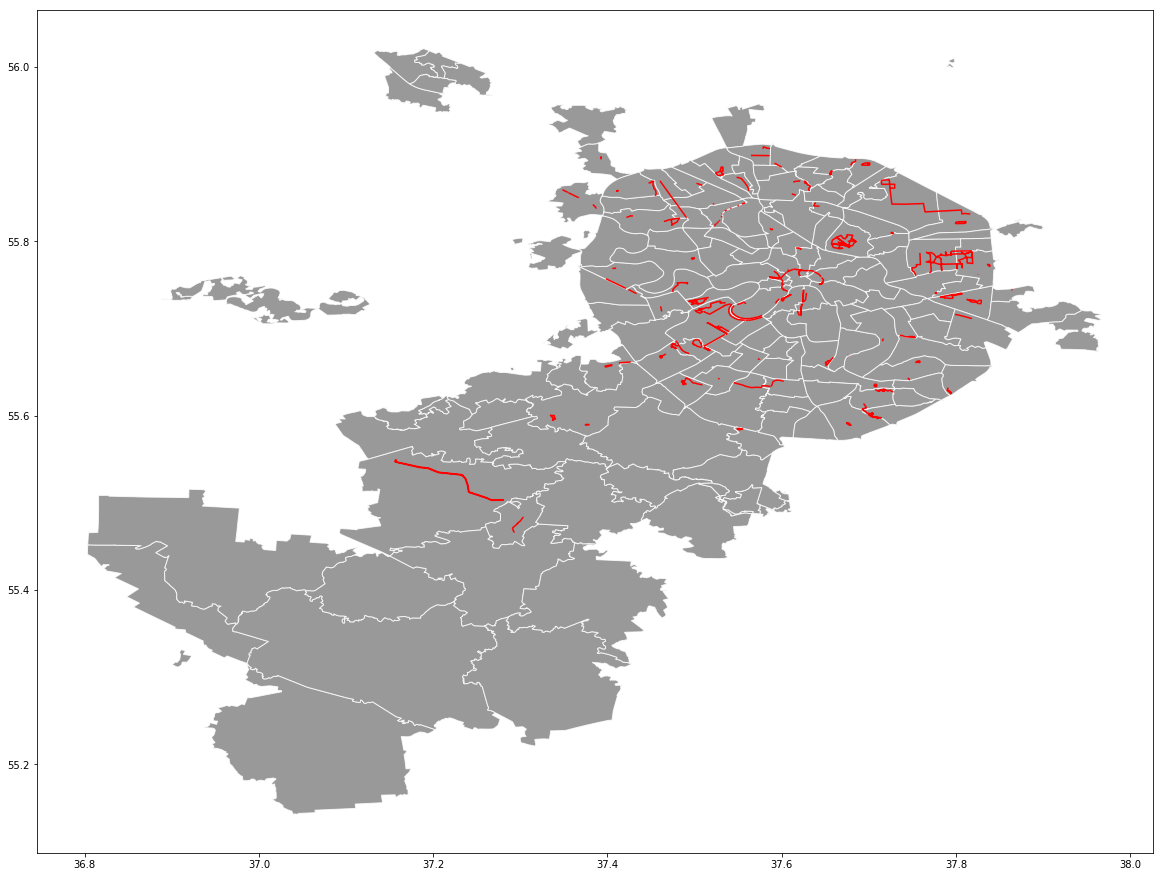

In [104]:
base=mos_adm_gdf.plot(color='gray', alpha=0.8, edgecolor='white', figsize=(20,20))
new_moscow_bike_lanes_normalized_gdf.plot(ax=base, color='red', markersize=10)

At first glance, this really doesn't look like a lot! I was really surprised by the long bike lane outside the city center, and how the bike lanes aren't clustered in the city center, unlike the bikeshare stations and the bike parking in Moscow. However, given how bike lanes seem to be governed by local neighborhood governments rather than Moscow's Department of Transportation (see the Departamental_Affiliation column), this actually isn't that unsurprising.

Now, I need to save this geodata frame so I can use it in my subsequent analysis.

### Saving my geopandas data frames

In [105]:
# need to drop the geodata_coordinates column before saving as a geojson file
new_moscow_bike_lanes_normalized_gdf.drop(columns='geodata_coordinates', inplace=True)

In [106]:
new_moscow_bike_lanes_normalized_gdf.to_file("../data/Moscow_Data/moscow_bike_lanes.geojson", driver='GeoJSON')